In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns
from pathlib import Path

from matplotlib.ticker import MaxNLocator

from nanosce_cv_cc import Ec

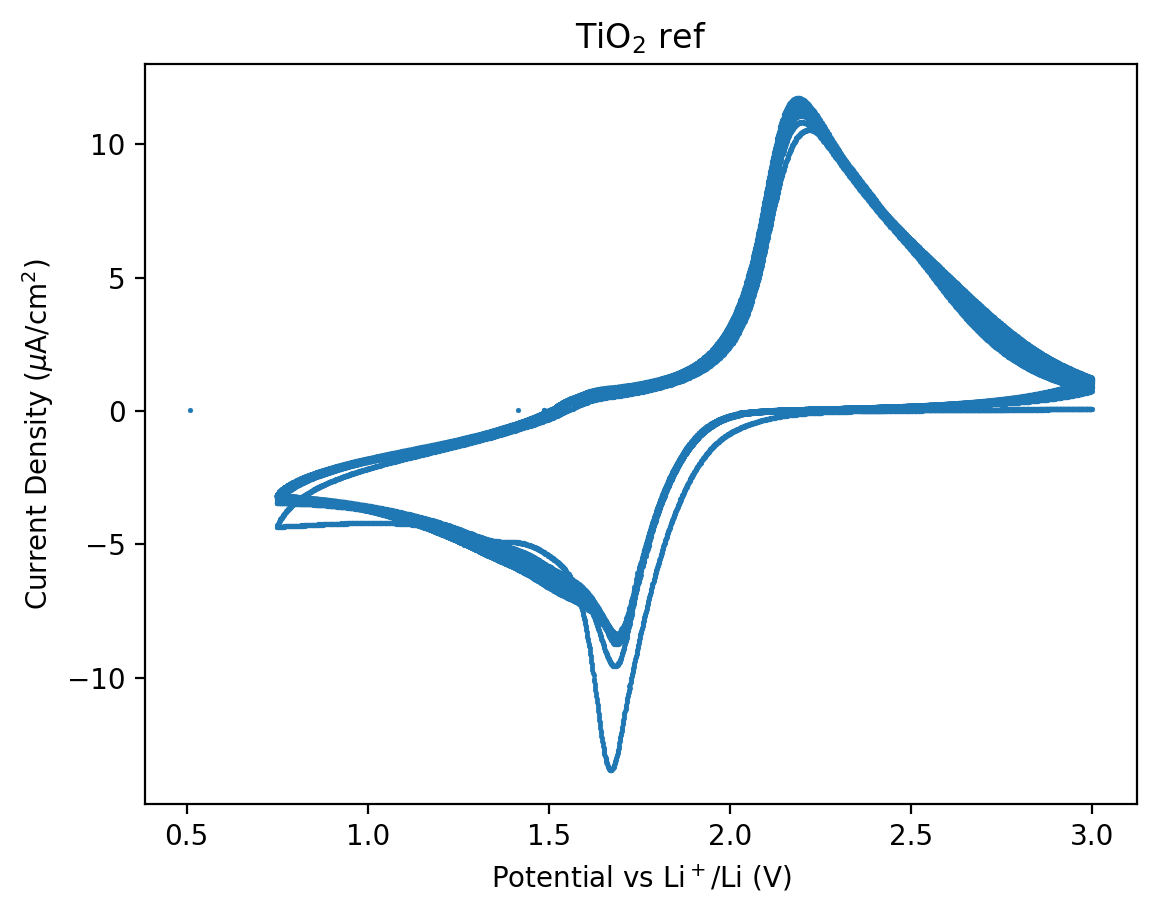

<Figure size 640x480 with 0 Axes>

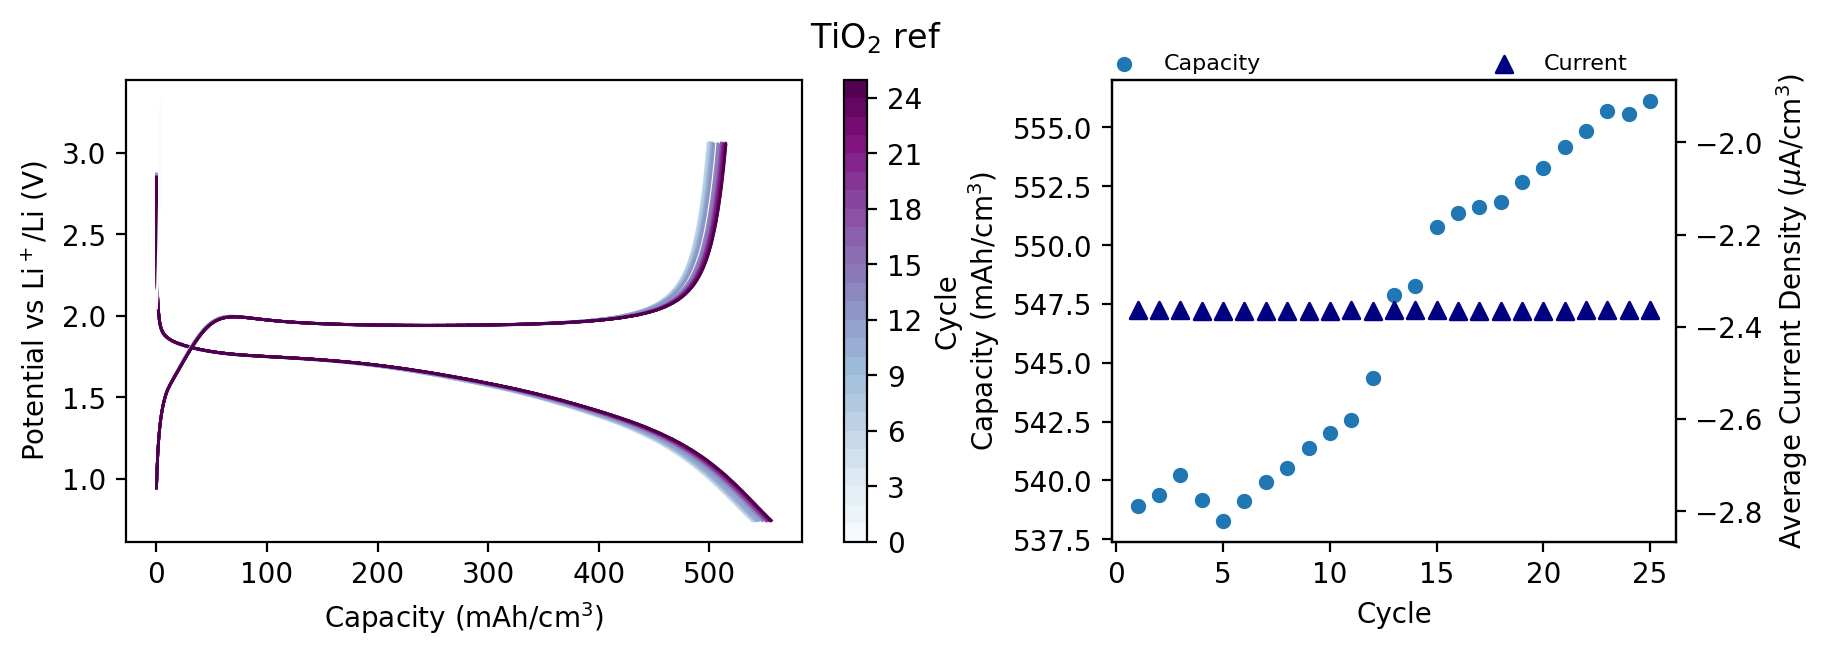

In [8]:
# =============================== TiO2 Reference ==============================================================================================
path_ref = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\TiO2ref'
df_cv_tio2_ref, capacity_tio2_ref, lith_tio2_ref, delith_tio2_ref = Ec.Electrochem(path_ref, 40, 0.63, 'TiO$_2$ ref')
data = [df_cv_tio2_ref, capacity_tio2_ref, lith_tio2_ref, delith_tio2_ref]
for i in data:
    i['Sample'] = 'TiO$_2$ Wet Cell'

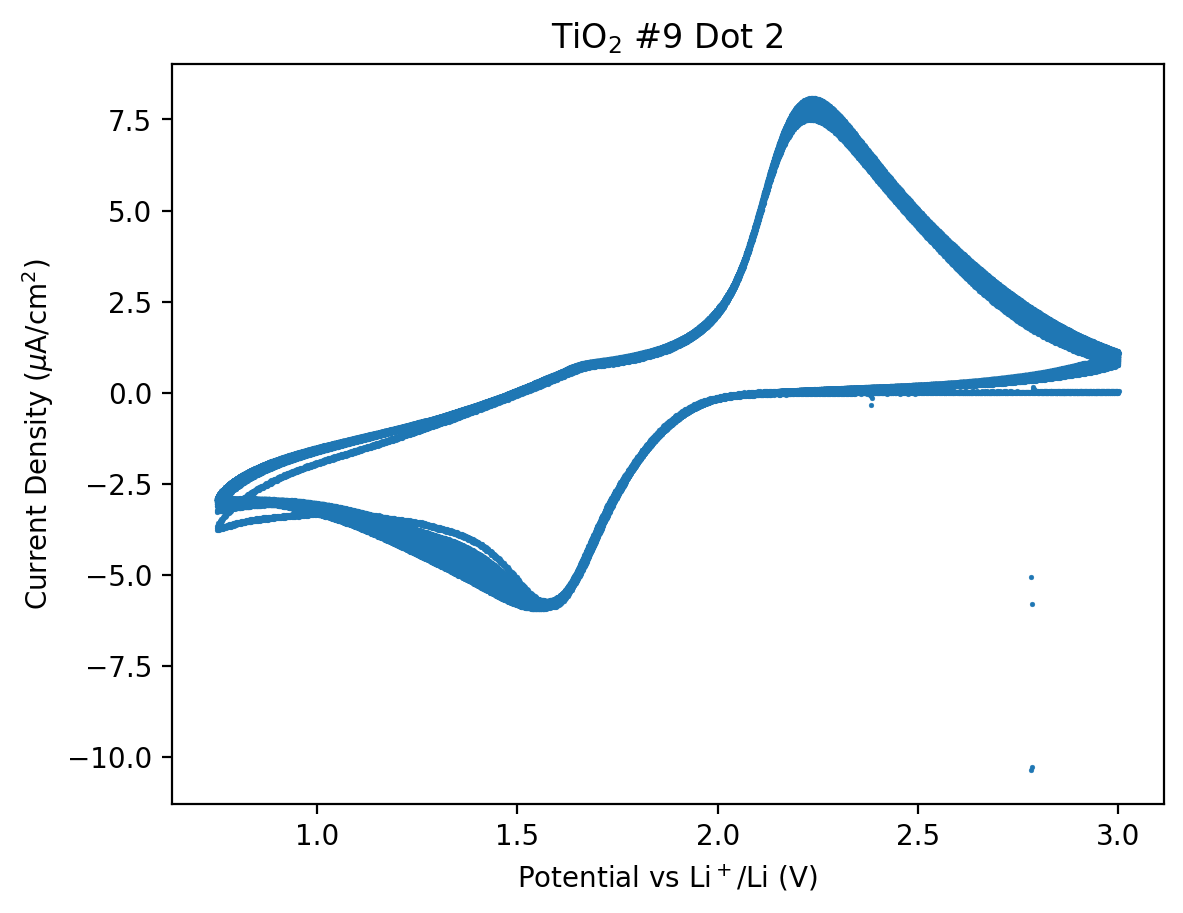

In [9]:
# =============================== TiO2 NanoSCE Dot 2 CV ==================================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot2\CV 5 charge discharge over weekend'
sample = 'TiO$_2$ #9 Dot 2'
df_cv_9d2, capacity_9d2, lith_9d2, delith_9d2 = Ec.Electrochem(path, 40, 0.12566, sample)
data = [df_cv_9d2, capacity_9d2, lith_9d2, delith_9d2]
for i in data:
    i['Sample'] = 'TiO$_2$ Solid Electrolyte Dot 2 CV'

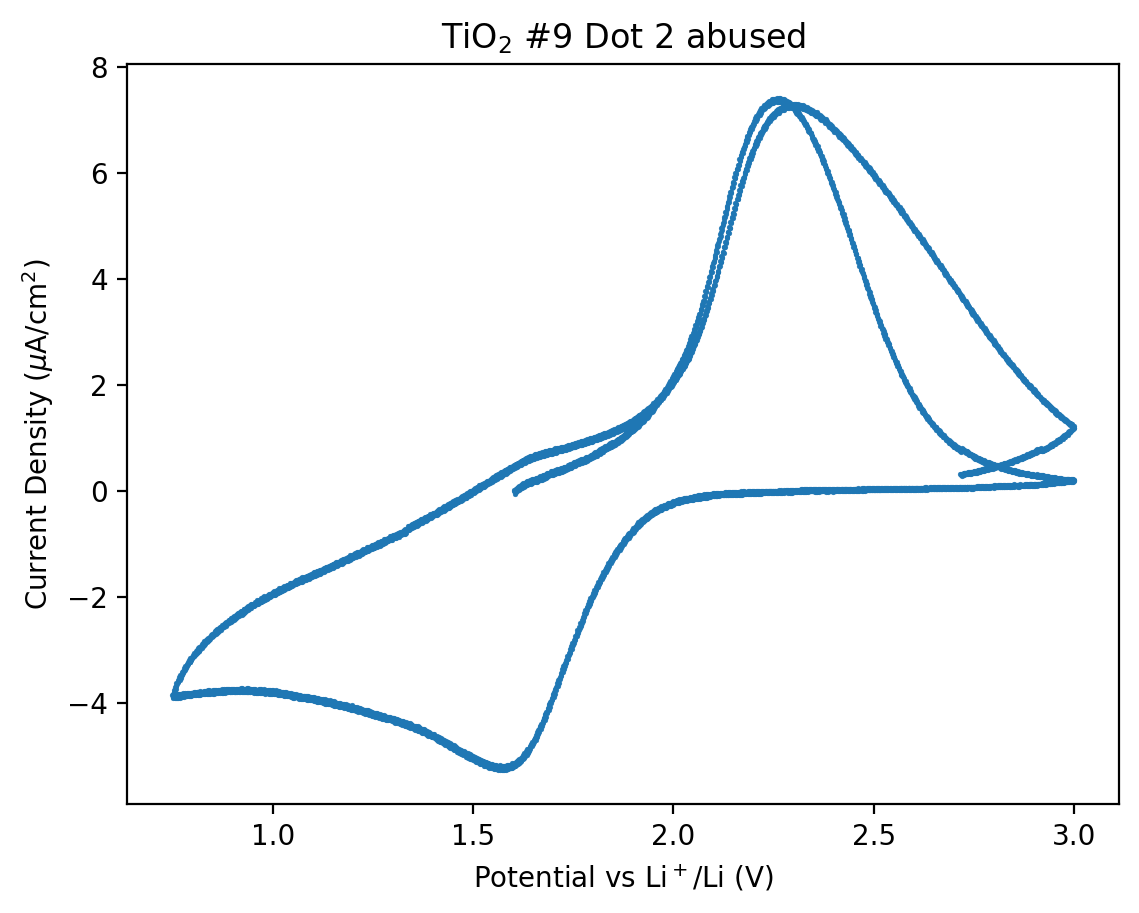

<Figure size 640x480 with 0 Axes>

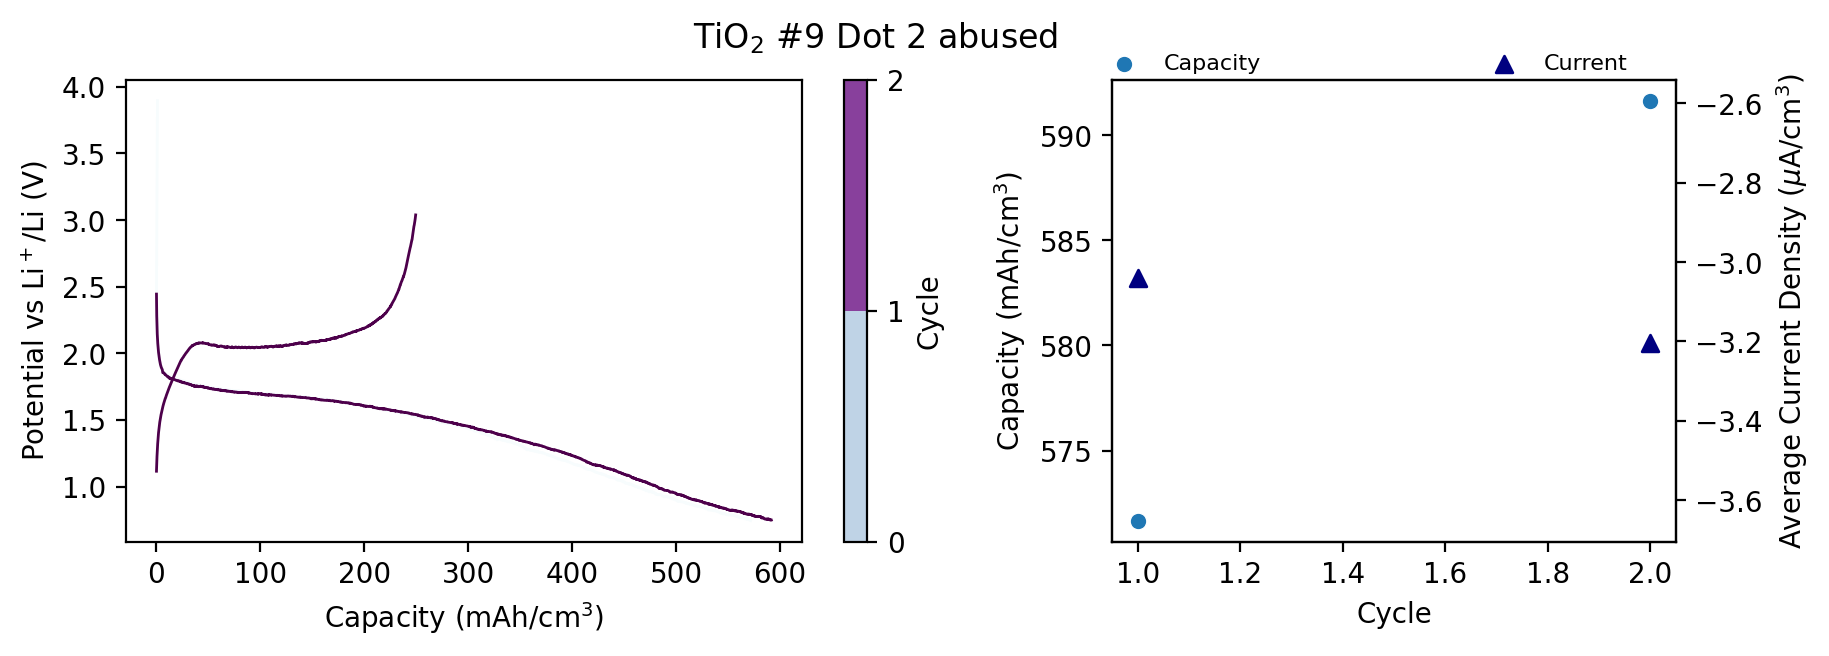

In [38]:
# =============================== TiO2 NanoSCE Dot 2 abused ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot2\CV 8 dot 2 (abused) charge discharge'
sample = 'TiO$_2$ #9 Dot 2 abused'
df_cv_9a, capacity_9a, lith_9a, delith_9a = Ec.Electrochem(path, 40, 0.12566, sample)
data = [df_cv_9a, capacity_9, lith_9a, delith_9a]
for i in data:
    i['Sample'] = 'TiO$_2$ Solid Electrolyte Dot 2 abused'

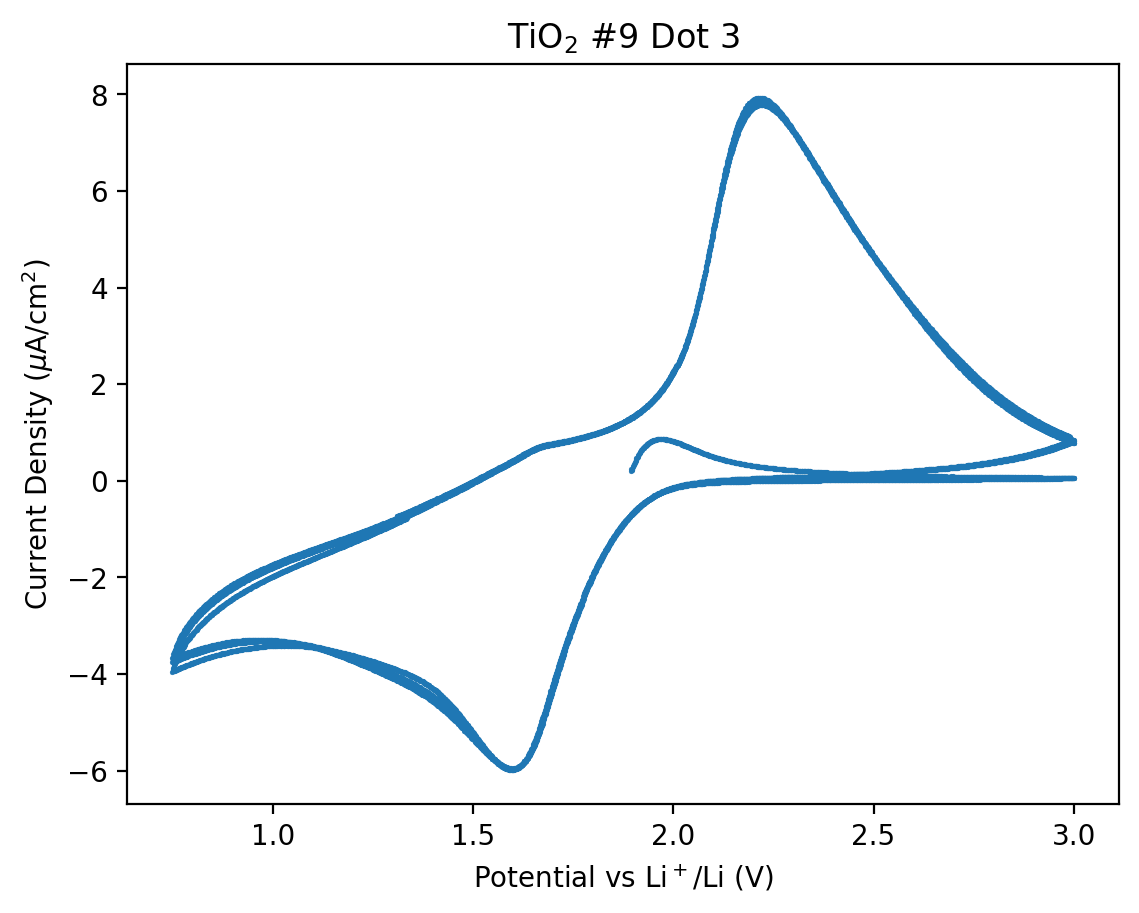

<Figure size 640x480 with 0 Axes>

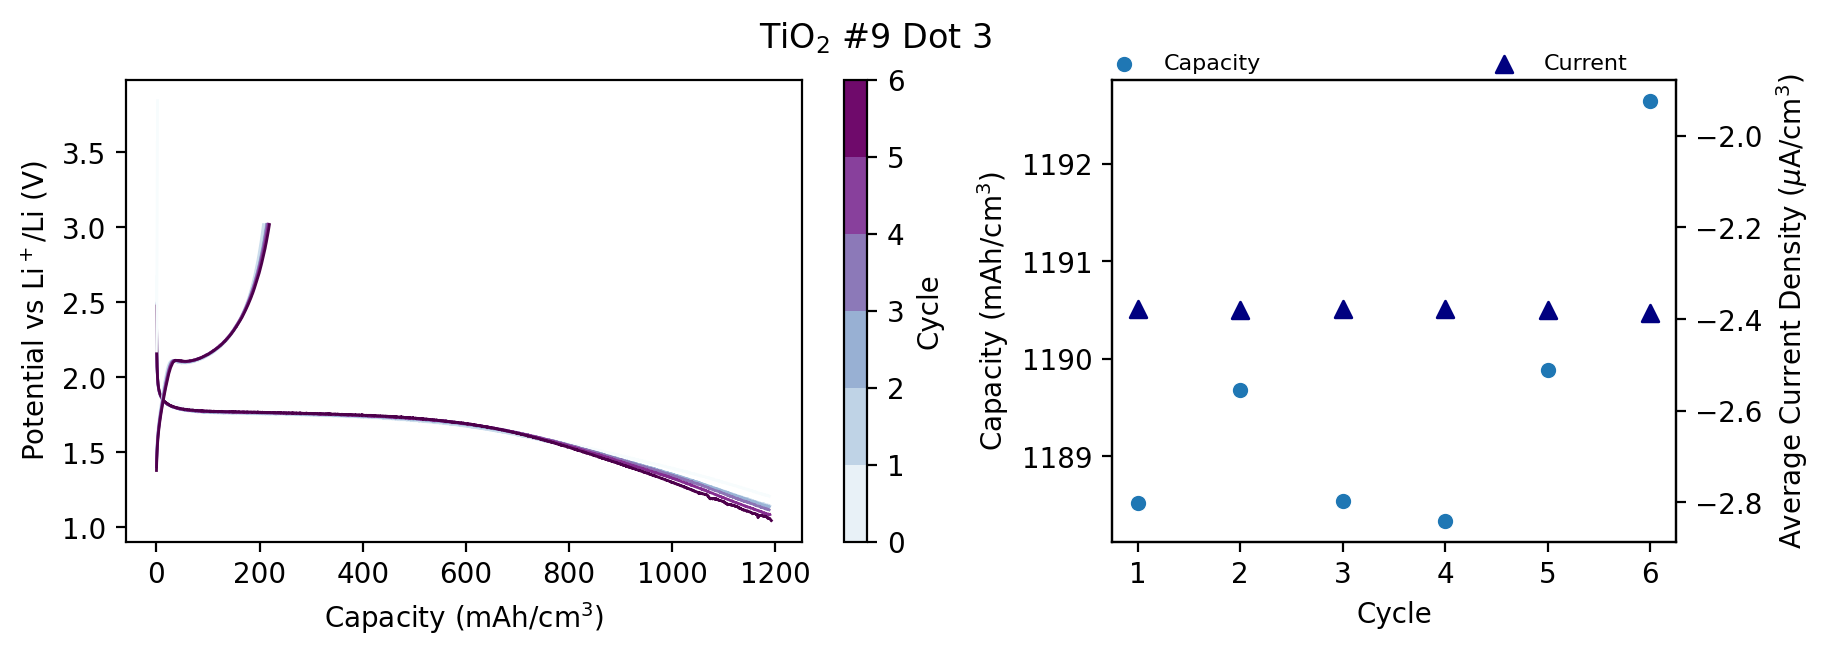

In [30]:
# ================================== TiO2 Dot3 run 1 ======================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot3\CV 13 dot 3 charge discharge'
sample = 'TiO$_2$ #9 Dot 3'
df_cv_9d3, capacity_9d3, lith_9ad3, delith_9ad3 = Ec.Electrochem(path, 40, 0.12566, sample)
data = [df_cv_9d3, capacity_9d3, lith_9ad3, delith_9ad3]
for i in data:
    i['Sample'] = 'TiO$_2$ Solid Electrolyte Dot 3'

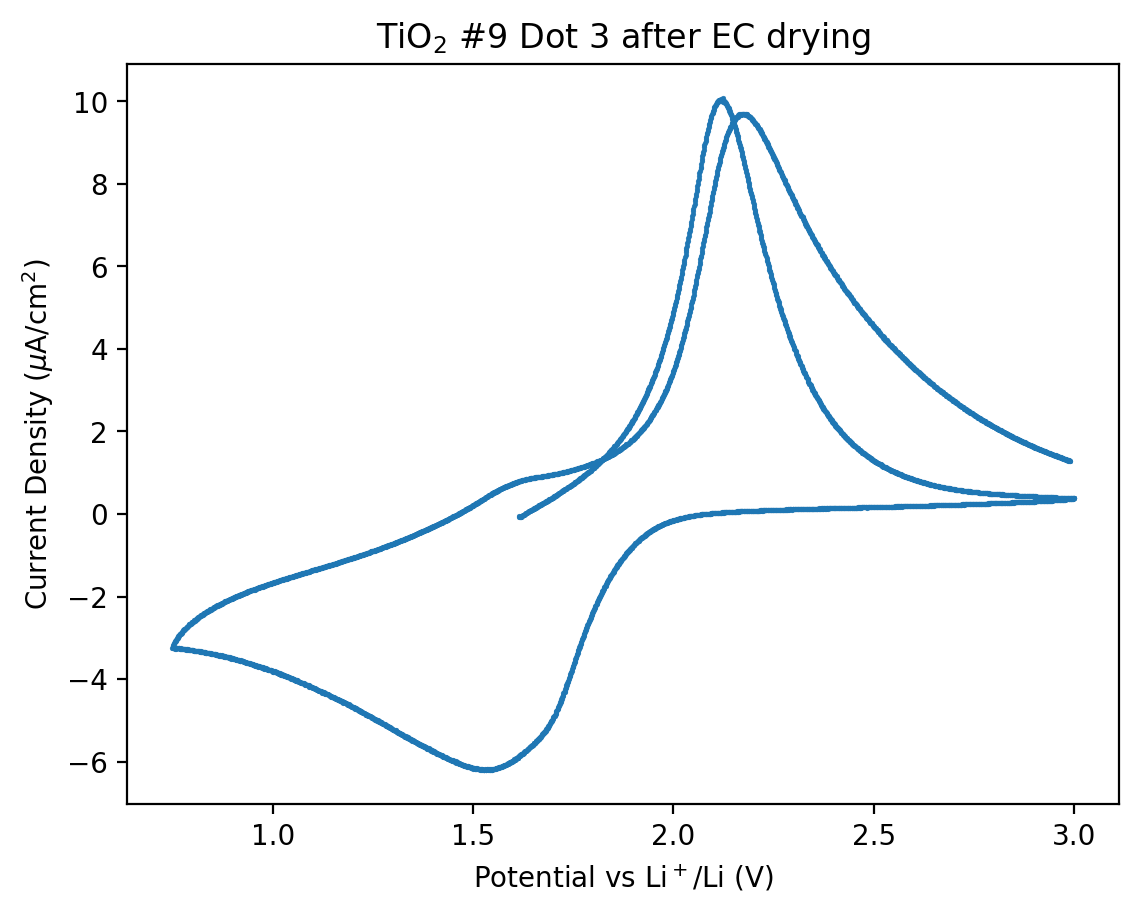

<Figure size 640x480 with 0 Axes>

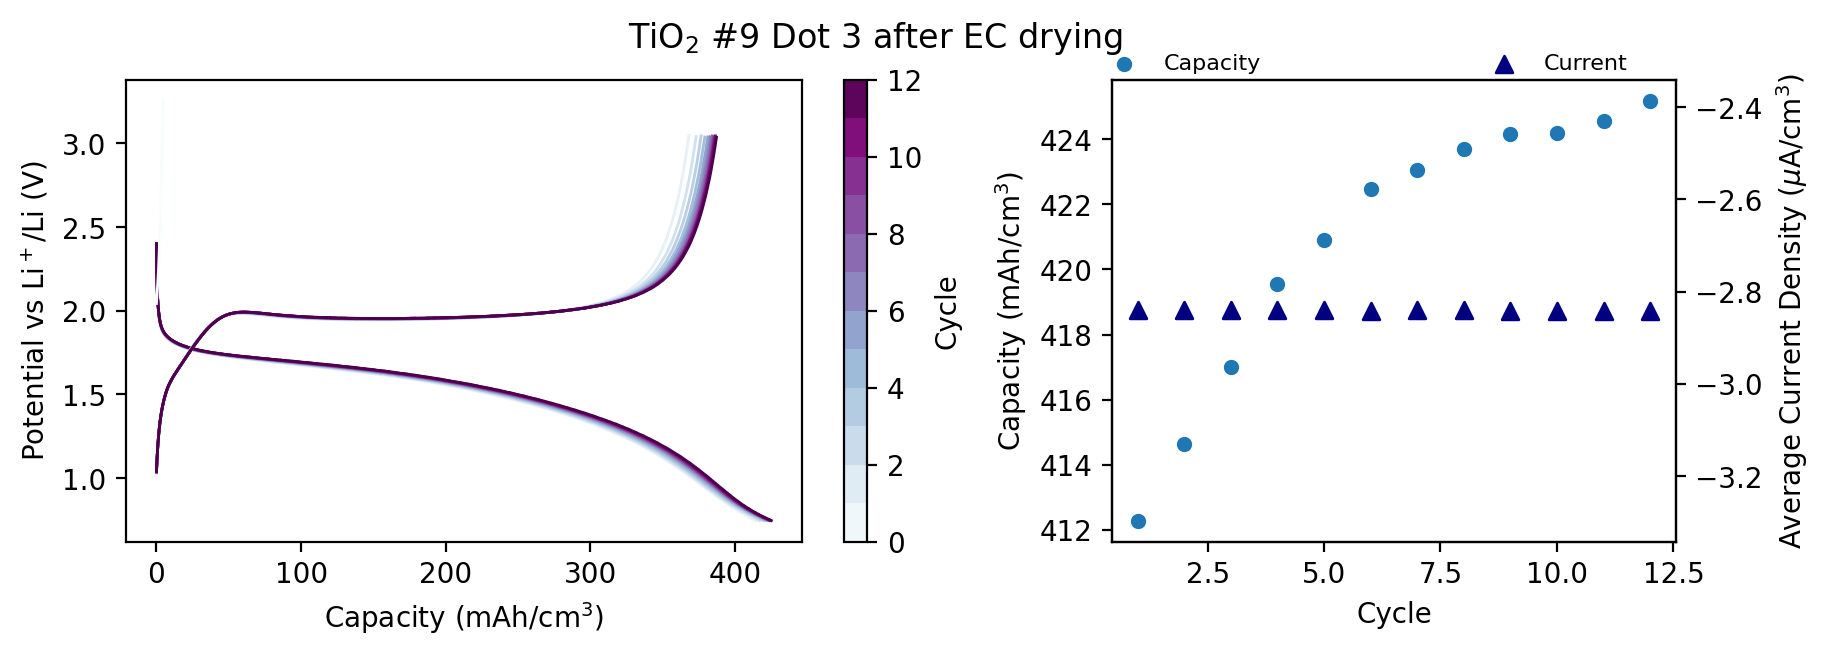

,Capacity (mAh/cm$^3$),Cycle,Sample,Average Current Density ($\mu$A/cm$^3$)
0,412.289082,1,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840654
1,414.639353,2,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840540
2,416.991234,3,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840443
3,419.555003,4,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840422
4,420.910487,5,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840261
5,422.469433,6,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.841451
6,423.062831,7,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840131
7,423.694026,8,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840402
8,424.142767,9,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.840762
9,424.197291,10,TiO$_2$ Solid Electrolyte Dot 3 EC drying,-2.841134


In [37]:
# ================================== TiO2 Dot3 run 2 after EC drying ======================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot3\CV 15 dot 3 C-D post dry'
sample = 'TiO$_2$ #9 Dot 3 after EC drying'
df_cv_9d3_dry, capacity_9d3_dry, lith_9ad3_dry, delith_9ad3_dry = Ec.Electrochem(path, 40, 0.12566, sample)
data = [df_cv_9d3_dry, capacity_9d3_dry, lith_9ad3_dry, delith_9ad3_dry]
for i in data:
    i['Sample'] = 'TiO$_2$ Solid Electrolyte Dot 3 EC drying'

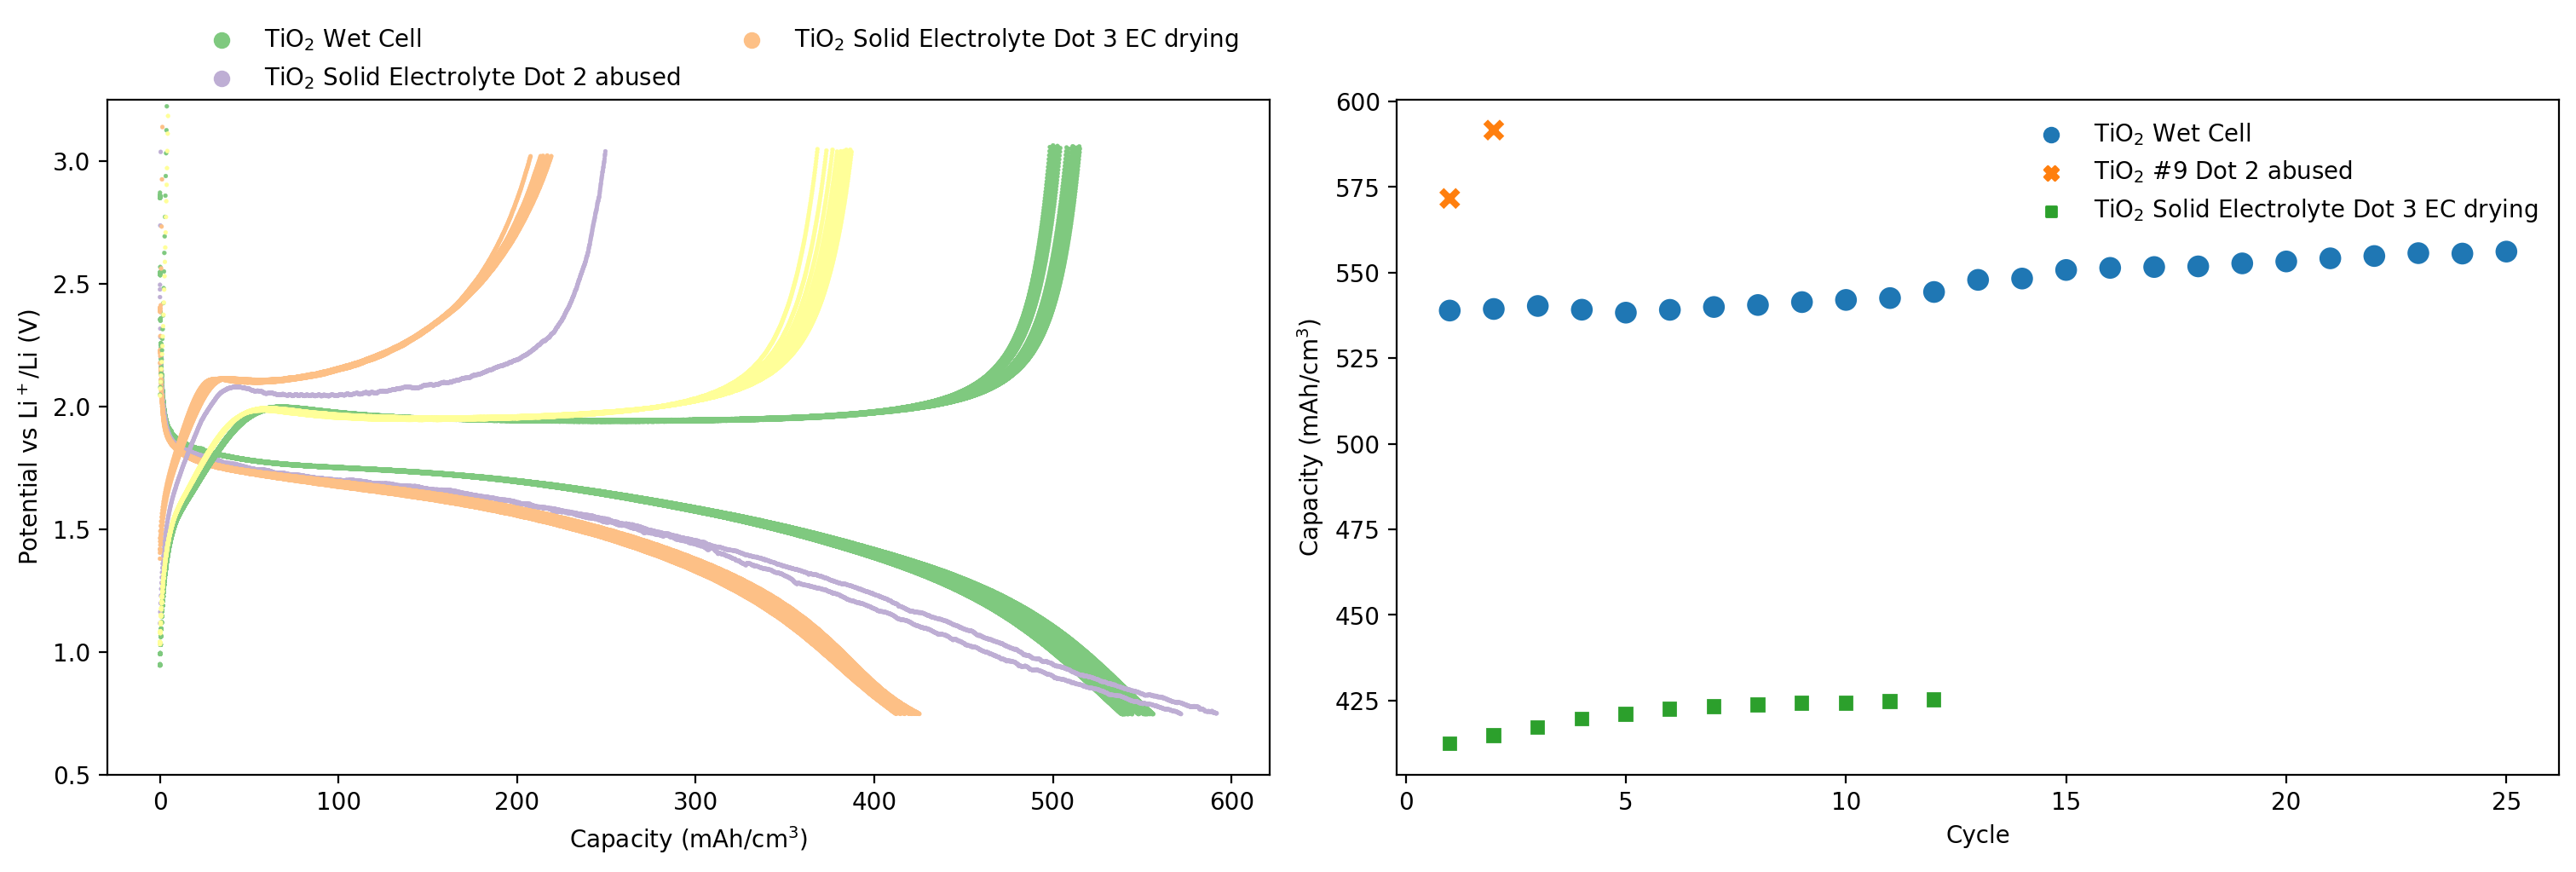

In [77]:
# ========================================= COMPARISON TiO2 =========================================
palette = 'BuPu'
p2 = 'PuRd'

cv = pd.concat([df_cv_tio2_ref, df_cv_9d2, df_cv_9a, df_cv_9d3, df_cv_9d3_dry], ignore_index=True)

lithiation = pd.concat([lith_tio2_ref, lith_9d2, lith_9a, lith_9ad3_dry], ignore_index=True) #, lith_9ad3

capacity_all = pd.concat([capacity_tio2_ref, capacity_9d2, capacity_9a, capacity_9d3_dry], ignore_index=True) # capacity_9d3

delithiation = pd.concat([delith_tio2_ref, delith_9d2, delith_9a, delith_9ad3, delith_9ad3_dry], ignore_index=True)

# ========== PLOT CV ================================================================================
# fig, ax = plt.subplots(dpi = 100)
# sns.scatterplot(data = cv, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'Sample', edgecolor = None, s = 3, ax = ax, palette='Accent')
# ax.legend(bbox_to_anchor=(1,1), frameon = False)

# ========== PLOT lith ================================================================================
fig, ax = plt.subplots(1,2, figsize = (15,5), dpi = 200, constrained_layout=True)
sns.scatterplot(data = lithiation, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Sample', edgecolor = None, s = 3, ax = ax[0], palette='Accent')
sns.scatterplot(data = delithiation, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Sample', edgecolor = None, s = 3, ax = ax[0], palette='Accent', legend = False)
ax[0].set_ylim(0.5, 3.25 )
ax[0].legend(bbox_to_anchor=(0.06,1.14), frameon = False, ncols = 2)

sns.scatterplot(data = capacity_all, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', ax = ax[1], s = 100)
ax[1].legend(frameon = False)


# df = pd.concat([df_cv_ref, df_cv_9])
# df2 = pd.concat([df_cv_9, df_cv_9a])

# fig, ax = plt.subplots(dpi = 100)
# sns.scatterplot(data = df, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', edgecolor = None, s =3, hue = 'Sample')

# fig, ax = plt.subplots(dpi = 100)
# sns.scatterplot(data = df2, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', edgecolor = None, s =3, hue = 'Sample')


# fig, ax = plt.subplots(dpi = 100)
# Z = [[0,0],[0,0]]                                                                       # Creates color bar
# cbar = plt.contourf(Z, levels = np.arange(0, 3, 1), cmap=p2)
# cbar2 = plt.contourf(Z, levels = np.arange(0, 26, 1), cmap=palette)
# plt.clf()



# # plt.xlim(0.5, 3.25)
# sns.lineplot(data = lith, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = palette, lw = 1, legend = False)
# sns.lineplot(data = delith, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = palette, lw = 1, legend = False)
# sns.lineplot(data = lith_9a, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = p2, lw = 1, legend = False)
# sns.lineplot(data = delith_9a, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = p2, lw = 1, legend = False)

# cb = plt.colorbar(cbar, anchor = (1.4,0)).set_ticks([])
# cb2 = plt.colorbar(cbar2, anchor = (4.4,0)).set_label('Cycle')

# plt.colorbar(cbar2)
# lith
# plt.show().set_label('Cycle')

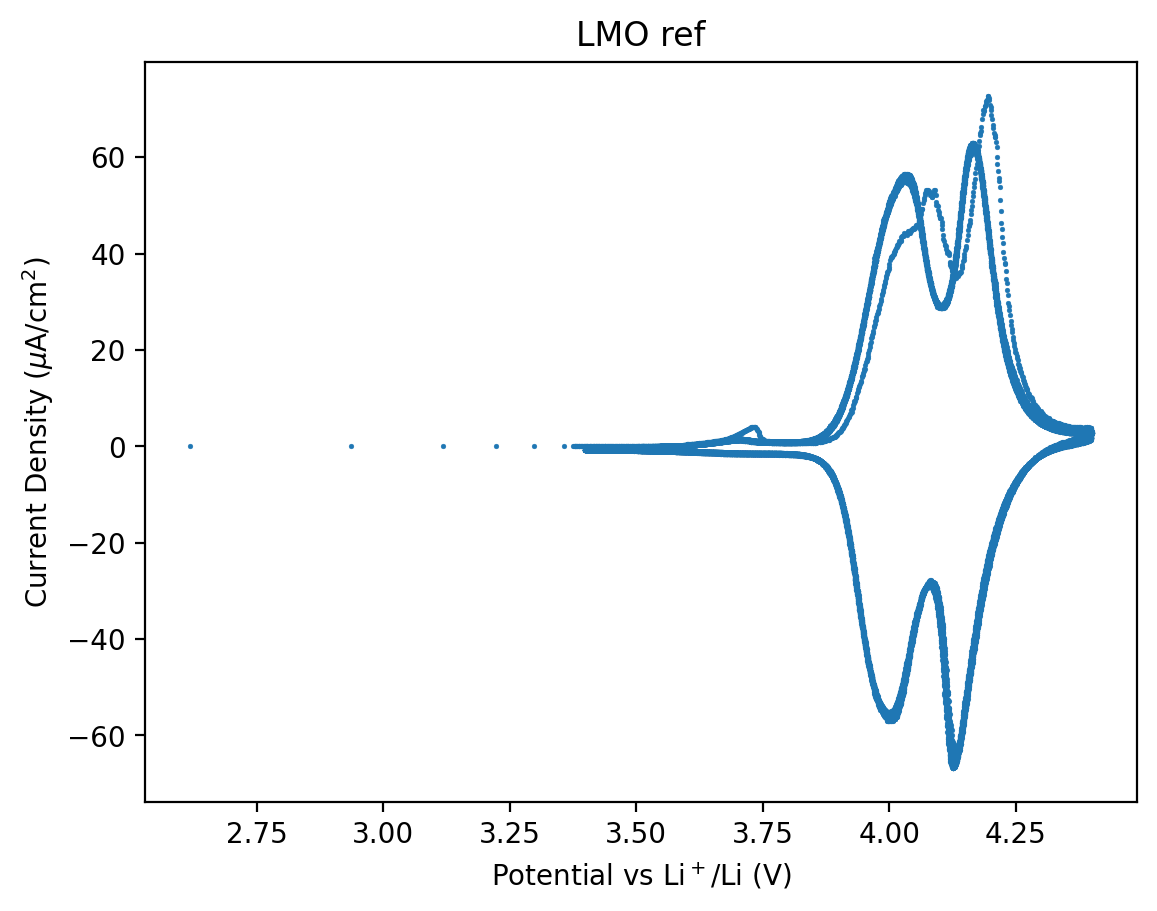

<Figure size 640x480 with 0 Axes>

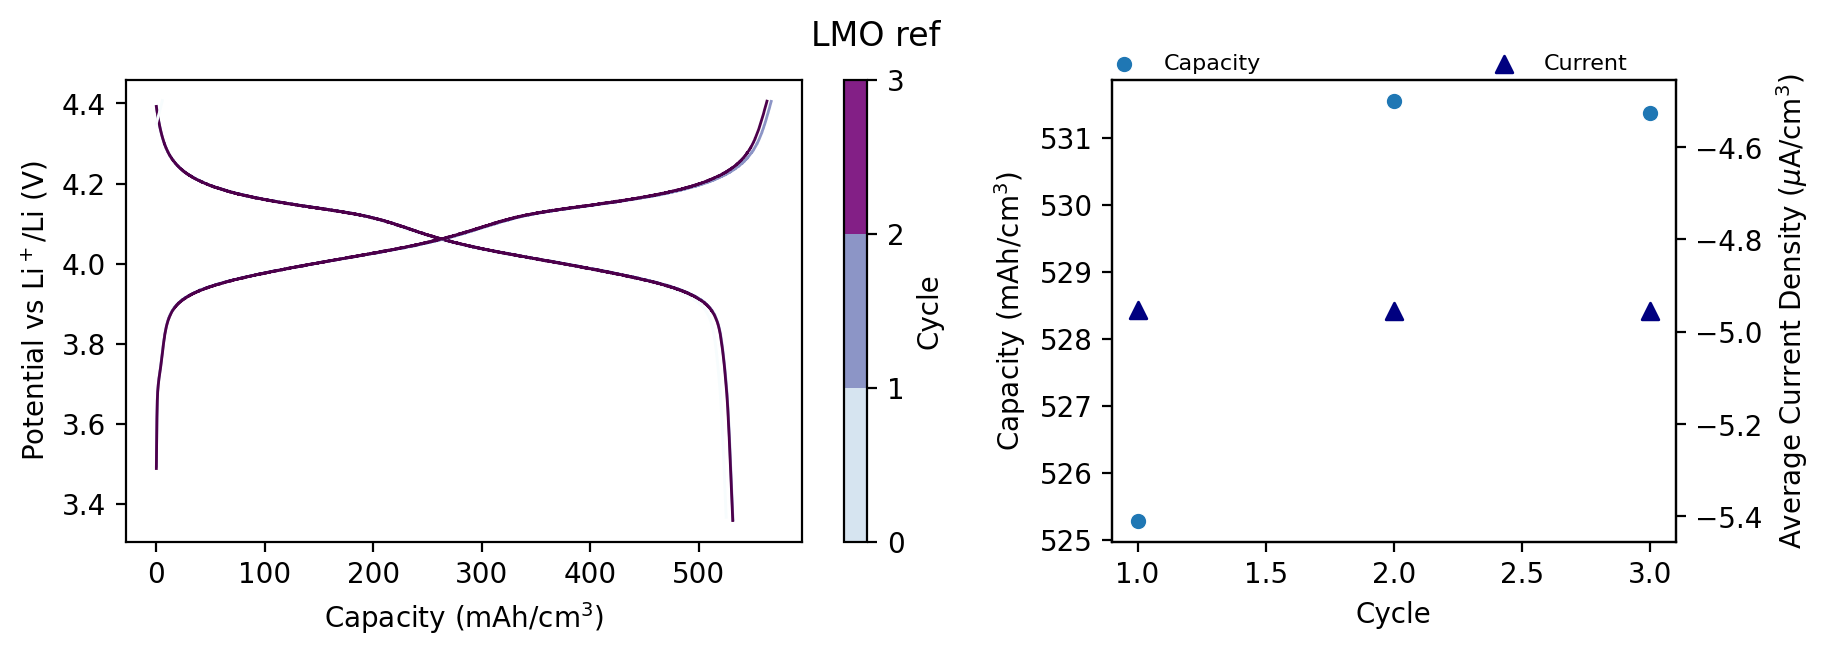

,Potential vs Li$^+$/Li (V),Current (A),Current Density ($\mu$A/cm$^2$),Scan,CV,Sample
0,3.376465,3.753662e-09,0.005958,1,Activation CV,LMO ref
1,3.377991,5.493164e-09,0.008719,1,Activation CV,LMO ref
2,3.378296,1.098633e-08,0.017439,1,Activation CV,LMO ref
3,3.379517,1.312256e-08,0.020829,1,Activation CV,LMO ref
4,3.380432,4.486084e-09,0.007121,1,Activation CV,LMO ref
...,...,...,...,...,...,...
38465,4.385986,1.703796e-06,2.704439,20,Activation CV,LMO ref
38466,4.385681,1.685181e-06,2.674890,20,Activation CV,LMO ref
38467,4.386292,1.652222e-06,2.622574,20,Activation CV,LMO ref
38468,4.389038,1.676331e-06,2.660842,20,Activation CV,LMO ref


In [83]:
# ============================================ LMO ref wet cell ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\LMOref'
sample = 'LMO ref'
df_cv_lmo_ref, capacity_lmo_ref, lith_lmo_ref, delith_lmo_ref = Ec.Electrochem(path, 80, 0.63, sample)
data = [df_cv_lmo_ref, capacity_lmo_ref, lith_lmo_ref, delith_lmo_ref]
for i in data:
    i['Sample'] = sample
    
df_cv_lmo_ref
    

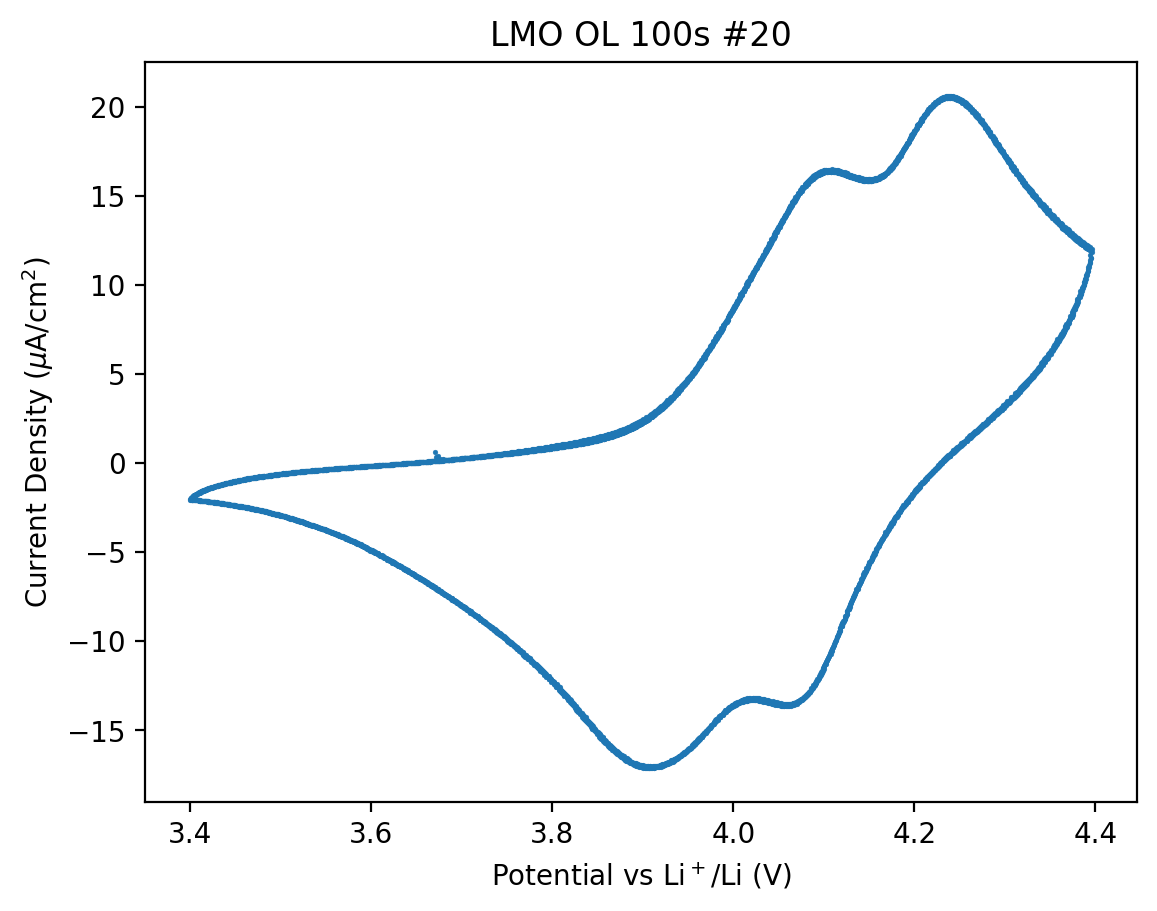

<Figure size 640x480 with 0 Axes>

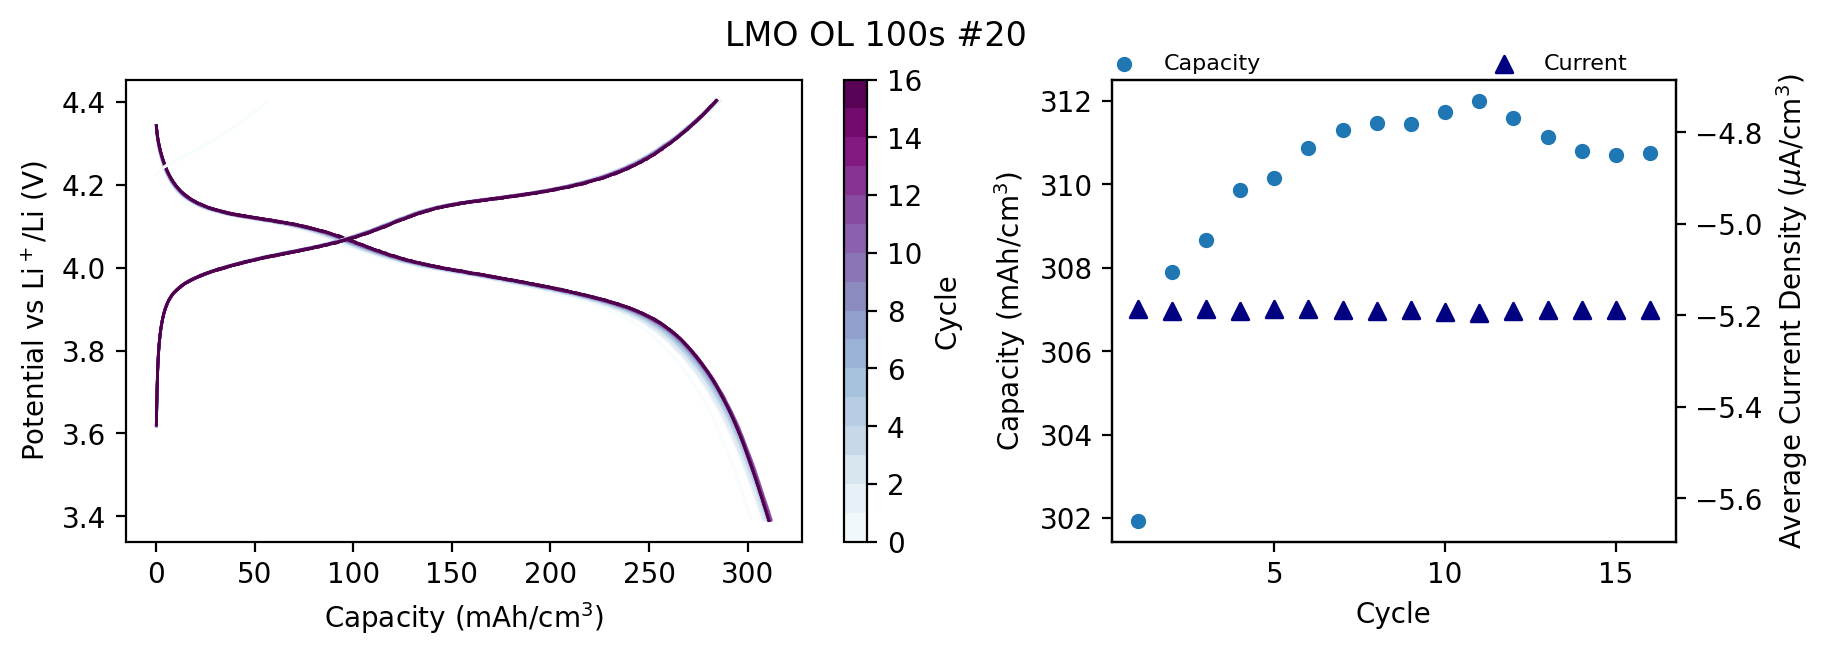

In [82]:
# =============================== LMO ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\20 LMO OL 100s'
sample = 'LMO OL 100s #20'
df_cv_20, capacity_20, lith_20, delith_20 = Ec.Electrochem(path, 80, 0.12566, sample)